In [1]:
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display

import numpy as np
import IPython.display as ipd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from zipfile import ZipFile
file_name = 'new.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
import pandas as pd
dataset = pd.read_csv('Audio_file.csv')
dataset.tail(10)

,file_names,class,class_id
70,Abhilash_S0.wav,Abhilash S,8
71,Abhilash_S1.wav,Abhilash S,8
72,Abhilash_S2.wav,Abhilash S,8
73,Abhilash_S3.wav,Abhilash S,8
74,Abhilash_S4.wav,Abhilash S,8
75,Abhilash_S5.wav,Abhilash S,8
76,Abhilash_S6.wav,Abhilash S,8
77,Abhilash_S7.wav,Abhilash S,8
78,Abhilash_S8.wav,Abhilash S,8
79,Abhilash_S9.wav,Abhilash S,8


In [4]:
dataset['class'].value_counts()

Aayush Gupta        10
Aman Anand          10
Abinash Dubey       10
Challa Priyankar    10
Viswamber Prasad    10
Akshay Hegde        10
Khushi Kumari       10
Abhilash S          10
Name: class, dtype: int64

Text(0.5, 1.0, 'Count of records in each class')

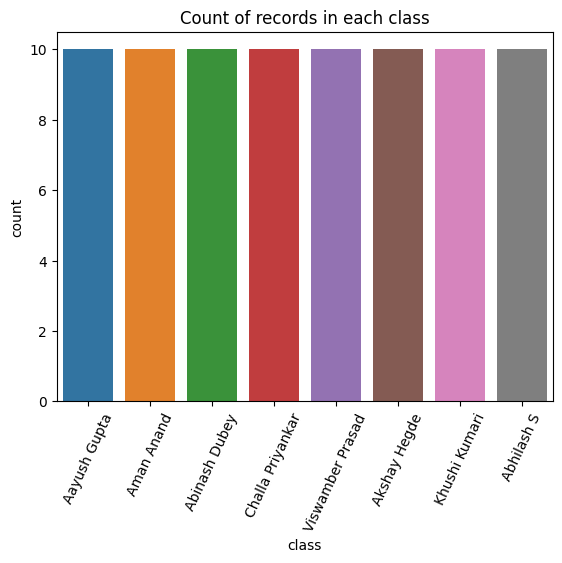

In [55]:
import seaborn as sns
ax = sns.countplot(x='class', data=dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
plt.title("Count of records in each class")

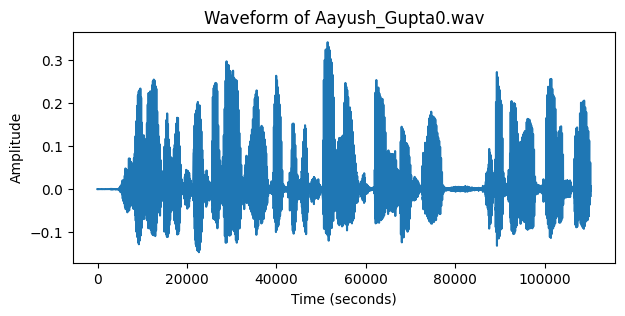

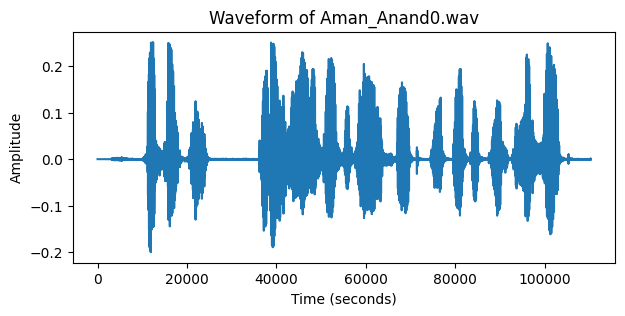

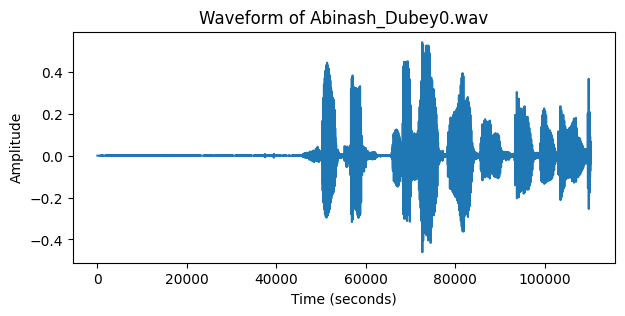

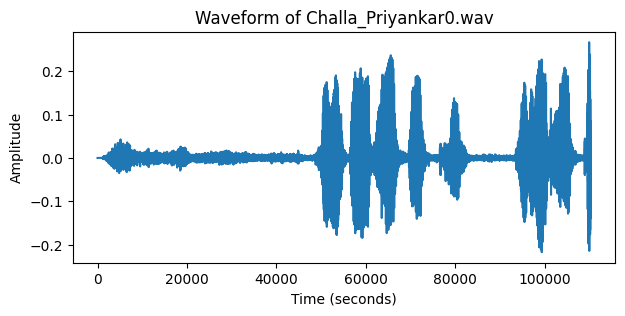

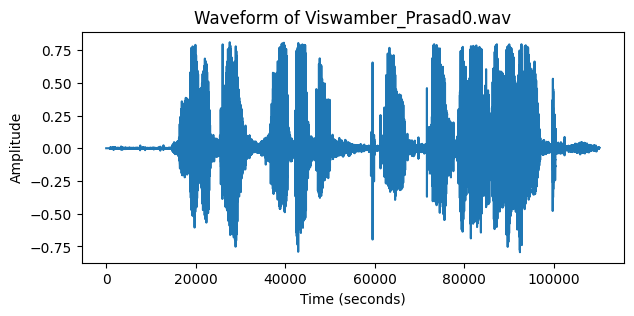

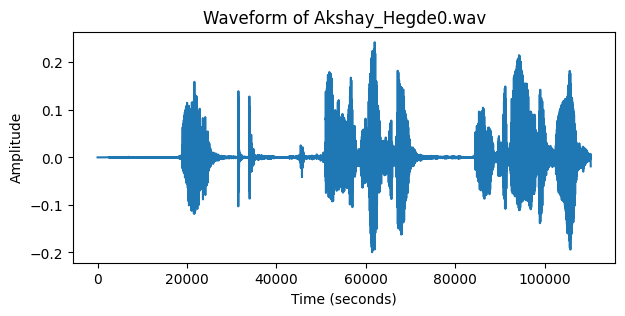

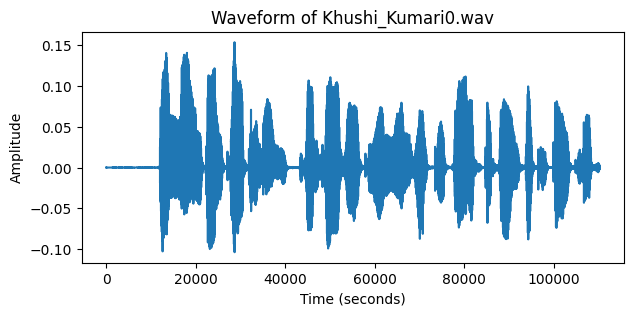

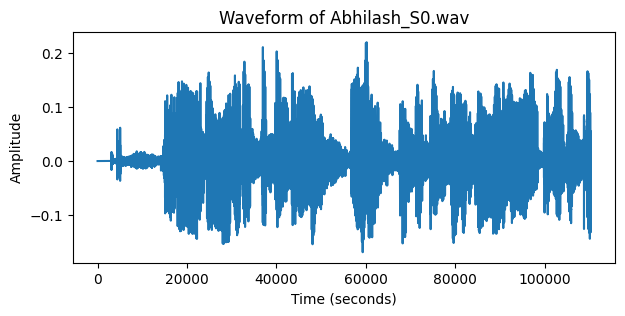

In [66]:
directory_path = 'audi'

# Load the CSV file that contains the file names and labels
csv_file_path = 'Audio_file.csv'
data = pd.read_csv(csv_file_path)

# Loop through all classes
for     label in data['class_id'].unique():
        class_data = data[data['class_id'] == label]
    
    # Loop through all audio files in the class
        filename = class_data.iloc[0]['file_names']
        file_path = os.path.join(directory_path, filename)
        audio, sr = librosa.load(file_path)  # Load audio file
        
        # Extract waveform
        plt.figure(figsize=(7, 3))
        plt.plot(audio)
        plt.title(f'Waveform of {filename}')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Amplitude')
        plt.show()


In [6]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [7]:
audio_dataset_path = 'audi'

In [8]:
import numpy as np
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(dataset.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_names"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

80it [00:13,  5.89it/s]


In [9]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.tail()

,feature,class
75,"[-295.73685, 152.37706, 2.5421731, 9.709633, 2...",Abhilash S
76,"[-299.9357, 143.43497, 4.268081, 18.545166, 27...",Abhilash S
77,"[-298.91287, 137.80005, 6.998546, 18.262844, 2...",Abhilash S
78,"[-308.3123, 124.37335, -0.62719226, 13.125991,...",Abhilash S
79,"[-305.21176, 144.76006, 11.25661, 14.49355, 26...",Abhilash S


In [10]:
extracted_features_df.to_csv('features_extracted.csv')

In [11]:
X_audio=np.array(extracted_features_df['feature'].tolist())
y_audio=np.array(extracted_features_df['class'].tolist())

In [12]:
unique_list = []
# traverse for all elements
for x in y_audio:
    # check if exists in unique_list or not
    if x not in unique_list:
        unique_list.append(x)
    # print list
print("category_name\n")

for x in unique_list:
    print(x)

category_name

Aayush Gupta
Aman Anand
Abinash Dubey
Challa Priyankar
Viswamber Prasad
Akshay Hegde
Khushi Kumari
Abhilash S


In [13]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y_audio =to_categorical(labelencoder.fit_transform(y_audio))

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_audio,y_audio,test_size=0.3,random_state=0)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [16]:
num_labels=y_audio.shape[1]

In [17]:
model=Sequential()
###first layer
model.add(Dense(180,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(360))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(180))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 180)               7380      
                                                                 
 activation (Activation)     (None, 180)               0         
                                                                 
 dropout (Dropout)           (None, 180)               0         
                                                                 
 dense_1 (Dense)             (None, 360)               65160     
                                                                 
 activation_1 (Activation)   (None, 360)               0         
                                                                 
 dropout_1 (Dropout)         (None, 360)               0         
                                                                 
 dense_2 (Dense)             (None, 180)               6

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 16

checkpointer = ModelCheckpoint(filepath='project/audio_classify.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
1/4 [======>.......................] - ETA: 7s - loss: 71.2479 - accuracy: 0.0625
Epoch 1: val_loss improved from inf to 25.43660, saving model to project\audio_classify.hdf5
4/4 [==============================] - 4s 362ms/step - loss: 58.3582 - accuracy: 0.1250 - val_loss: 25.4366 - val_accuracy: 0.0000e+00
Epoch 2/200
3/4 [=====================>........] - ETA: 0s - loss: 57.8761 - accuracy: 0.1250
Epoch 2: val_loss improved from 25.43660 to 18.82154, saving model to project\audio_classify.hdf5
4/4 [==============================] - 0s 153ms/step - loss: 56.5518 - accuracy: 0.1429 - val_loss: 18.8215 - val_accuracy: 0.0000e+00
Epoch 3/200
1/4 [======>.......................] - ETA: 0s - loss: 43.2334 - accuracy: 0.1875
Epoch 3: val_loss improved from 18.82154 to 11.09547, saving model to project\audio_classify.hdf5
4/4 [==============================] - 0s 94ms/step - loss: 50.1453 - accuracy: 0.1786 - val_loss: 11.0955 - val_accuracy: 0.0417
Epoch 4/200
1/4 [======>.....

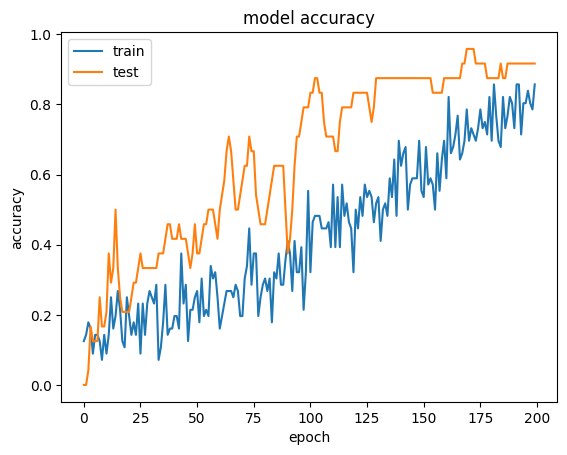

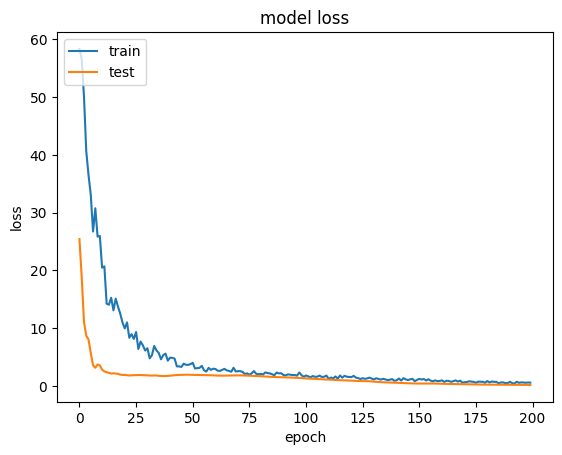

In [20]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
from zipfile import ZipFile
file_name = 'Test1.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [24]:
folder_path = "Test"
for filename in os.listdir(folder_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(folder_path, filename)
        audio, sample_rate = librosa.load(file_path)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T, axis=0)
        mfccs_scaled = mfccs_scaled.reshape(1, -1)
        
        predicted_label = model.predict(mfccs_scaled)
        classes = np.argmax(predicted_label, axis=1)
        prediction_label = predicted_label[0][classes]
        prediction_class = labelencoder.inverse_transform(classes)
        print(f"{filename}: {prediction_class[0]} (probability: {prediction_label.item():.2f})")

1/1 [==============================] - 0s 64ms/step
Aayush_Gupta10.wav: Aayush Gupta (probability: 0.97)
1/1 [==============================] - 0s 47ms/step
Aayush_Gupta11.wav: Aayush Gupta (probability: 0.99)
1/1 [==============================] - 0s 57ms/step
Abhilash_S10.wav: Abhilash S (probability: 0.97)
1/1 [==============================] - 0s 68ms/step
Akshay_Hegde10.wav: Akshay Hegde (probability: 1.00)
1/1 [==============================] - 0s 50ms/step
Akshay_Hegde11.wav: Akshay Hegde (probability: 1.00)
1/1 [==============================] - 0s 43ms/step
Akshay_Hegde12.wav: Akshay Hegde (probability: 1.00)
1/1 [==============================] - 0s 42ms/step
Khushi_Kumari10.wav: Khushi Kumari (probability: 0.97)
1/1 [==============================] - 0s 65ms/step
Khushi_Kumari11.wav: Khushi Kumari (probability: 0.98)
1/1 [==============================] - 0s 71ms/step
Khushi_Kumari12.wav: Khushi Kumari (probability: 0.96)
1/1 [==============================] - 0s 65ms/step
u

In [27]:
model1=Sequential()
###first layer
model1.add(Dense(180,input_shape=(40,)))
model1.add(Activation('tanh'))
model1.add(Dropout(0.5))
###second layer
model1.add(Dense(360))
model1.add(Activation('tanh'))
model1.add(Dropout(0.5))
###third layer
model1.add(Dense(180))
model1.add(Activation('tanh'))
model1.add(Dropout(0.5))

###final layer
model1.add(Dense(num_labels))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [28]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 180)               7380      
                                                                 
 activation_8 (Activation)   (None, 180)               0         
                                                                 
 dropout_6 (Dropout)         (None, 180)               0         
                                                                 
 dense_9 (Dense)             (None, 360)               65160     
                                                                 
 activation_9 (Activation)   (None, 360)               0         
                                                                 
 dropout_7 (Dropout)         (None, 360)               0         
                                                                 
 dense_10 (Dense)            (None, 180)              

In [29]:
um_epochs = 200
num_batch_size = 16

checkpointer = ModelCheckpoint(filepath='project/audio_classify2.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history2 = model1.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
1/4 [======>.......................] - ETA: 6s - loss: 2.5972 - accuracy: 0.1875
Epoch 1: val_loss improved from inf to 2.28561, saving model to project\audio_classify2.hdf5
4/4 [==============================] - 3s 221ms/step - loss: 2.6277 - accuracy: 0.1786 - val_loss: 2.2856 - val_accuracy: 0.0833
Epoch 2/200
1/4 [======>.......................] - ETA: 0s - loss: 3.2917 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 2.28561 to 2.12682, saving model to project\audio_classify2.hdf5
4/4 [==============================] - 0s 75ms/step - loss: 2.9767 - accuracy: 0.0536 - val_loss: 2.1268 - val_accuracy: 0.1250
Epoch 3/200
1/4 [======>.......................] - ETA: 0s - loss: 2.7140 - accuracy: 0.1250
Epoch 3: val_loss improved from 2.12682 to 2.01618, saving model to project\audio_classify2.hdf5
4/4 [==============================] - 0s 89ms/step - loss: 2.2693 - accuracy: 0.1607 - val_loss: 2.0162 - val_accuracy: 0.2083
Epoch 4/200
1/4 [======>.....................

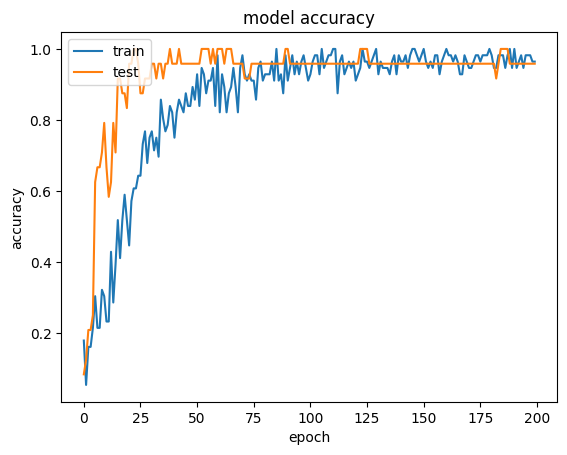

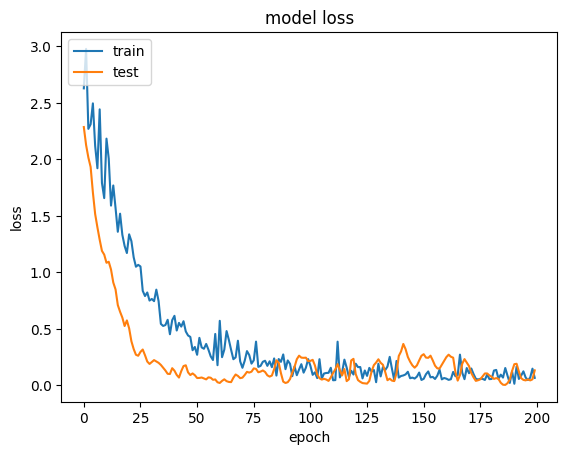

In [30]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
folder_path = "Test"
for filename in os.listdir(folder_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(folder_path, filename)
        audio, sample_rate = librosa.load(file_path)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T, axis=0)
        mfccs_scaled = mfccs_scaled.reshape(1, -1)
        
        predicted_label = model.predict(mfccs_scaled)
        classes = np.argmax(predicted_label, axis=1)
        prediction_label = predicted_label[0][classes]
        prediction_class = labelencoder.inverse_transform(classes)
        print(f"{filename}: {prediction_class[0]} (probability: {prediction_label.item():.2f})")

1/1 [==============================] - 0s 51ms/step
Aayush_Gupta10.wav: Aayush Gupta (probability: 0.97)
1/1 [==============================] - 0s 74ms/step
Aayush_Gupta11.wav: Aayush Gupta (probability: 0.99)
1/1 [==============================] - 0s 65ms/step
Abhilash_S10.wav: Abhilash S (probability: 0.97)
1/1 [==============================] - 0s 52ms/step
Akshay_Hegde10.wav: Akshay Hegde (probability: 1.00)
1/1 [==============================] - 0s 52ms/step
Akshay_Hegde11.wav: Akshay Hegde (probability: 1.00)
1/1 [==============================] - 0s 70ms/step
Akshay_Hegde12.wav: Akshay Hegde (probability: 1.00)
1/1 [==============================] - 0s 70ms/step
Khushi_Kumari10.wav: Khushi Kumari (probability: 0.97)
1/1 [==============================] - 0s 42ms/step
Khushi_Kumari11.wav: Khushi Kumari (probability: 0.98)
1/1 [==============================] - 0s 43ms/step
Khushi_Kumari12.wav: Khushi Kumari (probability: 0.96)
1/1 [==============================] - 0s 63ms/step
u

In [39]:
import sounddevice as sd
import numpy as np
import librosa

duration = 5  # duration of recording in seconds
sample_rate = 22050  # sampling rate of audio

print("Recording...")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1)
sd.wait()
print("Recording finished.")

mfccs_features = librosa.feature.mfcc(y=audio[:, 0], sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
predicted_label = model.predict(mfccs_scaled_features)
classes_x = np.argmax(predicted_label, axis=1)
prediction_class = labelencoder.inverse_transform(classes_x)
print(prediction_class[0])


Recording...
Recording finished.
1/1 [==============================] - 0s 42ms/step
Akshay Hegde


In [68]:
X_test.shape

(24, 40)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Split the data into k folds
k = 8
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Define your model
model = Sequential()
model.add(Dense(180, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(360))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(180))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Create arrays to store the accuracy scores
scores = []

# Loop through each fold
for train_index, test_index in kf.split(X_audio):
    # Split the data into training and testing sets
    X_train, X_test = X_audio[train_index], X_audio[test_index]
    y_train, y_test = y_audio[train_index], y_audio[test_index]
    
    # Fit the model on the training set
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Calculate the accuracy score and append it to the list of scores
    score = accuracy_score(y_true, y_pred)
    scores.append(score)

# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)

print('Mean accuracy:', mean_score)
print('Standard deviation:', std_score)

In [79]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_true, axis=1), y_pred , labels = unique_list)

# Plot confusion matrix as a heatmap
plt.imshow(cm, cmap='binary')
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks(range(len(unique_list)), unique_list, rotation=90)
plt.yticks(range(len(unique_list)), unique_list)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


1/1 [==============================] - 0s 50ms/step


NameError: name 'y_true' is not defined

In [77]:
len(unique_list)

8